# Projek 2: Logistic Regression & SVM
## Anggota Kelompok:
- Nabila Zulfika Hemadewi
- Vista Sasmita Padmanagara

---

## Dataset  Air Hujan di Australia
- **Konteks**: Prediksi hujan hari berikutnya dengan melatih model klasifikasi pada **variabel target RainTomorrow** .

- **Isi**: Kumpulan data ini berisi sekitar 10 tahun pengamatan cuaca harian dari banyak lokasi di seluruh Australia.
RainTomorrow adalah variabel target untuk diprediksi. Artinya -- apakah hari berikutnya hujan, Ya atau Tidak? Kolom ini adalah Ya jika hujan untuk hari itu adalah 1mm atau lebih.



# Import library and Preparing Data

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats

# EDA
import matplotlib.pyplot as plt
import seaborn as sns

# scaling data
from sklearn.preprocessing import StandardScaler

# splitting data
from sklearn.model_selection import train_test_split

# modelling
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

# saving model
import pickle

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/weatherAUS.csv", parse_dates=['Date'])

Mari kita cek dimensi data yang kita miliki.

In [ ]:
df.shape

(145460, 23)

Dimensi data:
- 23 kolom
- 145.460 baris

Lihat lima data teratas dari df.

In [ ]:
df.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No


Cek informasi mengenai dataset yang kita miliki.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

Dari informasi diatas, diketahui bahwa ada banyak sekali atribut yang memiliki nilai null, untuk itu penting sekali untuk kita melakukan cleaning data terlebih dahulu.

# Cleaning Data

In [ ]:
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Day'] = pd.DatetimeIndex(df['Date']).day

**Periksa apakah ada nilai null atau tidak.**

In [ ]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
Year                 0
Month                0
Day                  0
dtype: int64

Wah banyak sekali, untuk ini mari lakukan **dropna**.

In [ ]:
df.dropna(inplace=True)
df.isnull().sum().sum()

0

Berhasil! Nilai null sudah teratasi.

**Periksa apakah ada nilai terduplikat atau tidak.**

In [ ]:
df.duplicated().sum()

0

Tidak ada nilai terduplikat.

**Cek statistik deskriptif dataframe.**

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,13.464770,24.219206,2.130397,5.503135,7.735626,40.877366,15.667228,19.786778,65.874123,49.601985,1017.239505,1014.795580,4.241705,4.326515,18.204961,22.710333,2012.221074,6.425009,15.723910
std,6.416689,6.970676,7.014822,3.696282,3.758153,13.335232,8.317005,8.510180,18.513289,20.197040,6.909357,6.870892,2.797162,2.647251,6.567991,6.836543,2.450978,3.451383,8.782527
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-0.700000,3.700000,2007.000000,1.000000,1.000000
25%,8.600000,18.700000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,35.000000,1012.700000,1010.100000,1.000000,2.000000,13.100000,17.400000,2010.000000,3.000000,8.000000
50%,13.200000,23.900000,0.000000,5.000000,8.600000,39.000000,15.000000,19.000000,67.000000,50.000000,1017.200000,1014.700000,5.000000,5.000000,17.800000,22.400000,2012.000000,6.000000,16.000000
75%,18.400000,29.700000,0.600000,7.400000,10.700000,48.000000,20.000000,26.000000,79.000000,63.000000,1021.800000,1019.400000,7.000000,7.000000,23.300000,27.900000,2014.000000,9.000000,23.000000
max,31.400000,48.100000,206.200000,81.200000,14.500000,124.000000,67.000000,76.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,9.000000,39.400000,46.100000,2017.000000,12.000000,31.000000


# Exploratory Data Analysis
## Distribusi RainTomorrow

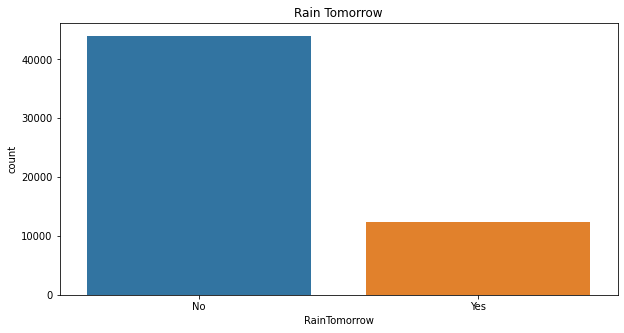

In [ ]:
plt.figure(figsize=(10,5))

sns.countplot (x='RainTomorrow', data=df)
plt.title('Rain Tomorrow')

plt.show()

## Kurva RainTomorrow berdasarkan rentang waktu

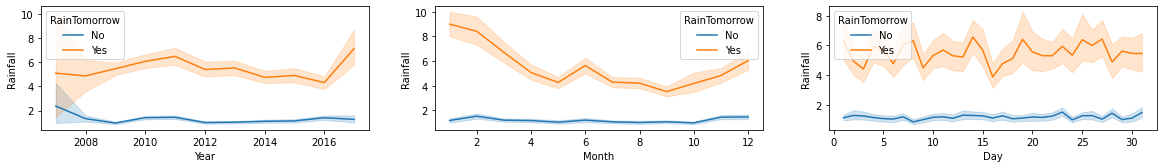

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(2,3,1)
sns.lineplot (x='Year', y='Rainfall', hue='RainTomorrow', data=df)

plt.subplot(2,3,2)
sns.lineplot (x='Month', y='Rainfall', hue='RainTomorrow', data=df)

plt.subplot(2,3,3)
sns.lineplot (x='Day', y='Rainfall', hue='RainTomorrow', data=df)

# Preprocessing Data

In [ ]:
df.drop(columns=['Date','Year', 'Month', 'Day'], inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df['Location'] = label.fit_transform(df['Location'])
df['WindGustDir'] = label.fit_transform(df['WindGustDir'])
df['WindDir9am'] = label.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = label.fit_transform(df['WindDir3pm'])
df['RainToday'] = label.fit_transform(df['RainToday'])
df['RainTomorrow'] = label.fit_transform(df['RainTomorrow'])

df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,4,17.9,35.2,0.0,12.0,12.3,11,48.0,1,12,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
6050,4,18.4,28.9,0.0,14.8,13.0,8,37.0,10,10,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
6052,4,19.4,37.6,0.0,10.8,10.6,5,46.0,5,6,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
6053,4,21.9,38.4,0.0,11.4,12.2,14,31.0,14,15,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
6054,4,24.2,41.0,0.0,11.2,8.4,14,35.0,7,14,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0


## Features Selection

Mari kita lihat atribut mana saja yang memiliki hubungan paling dekat dengan target kita yaitu **RainTomorrow**, gunakan heatmap untuk lebih mudah melihatnya.

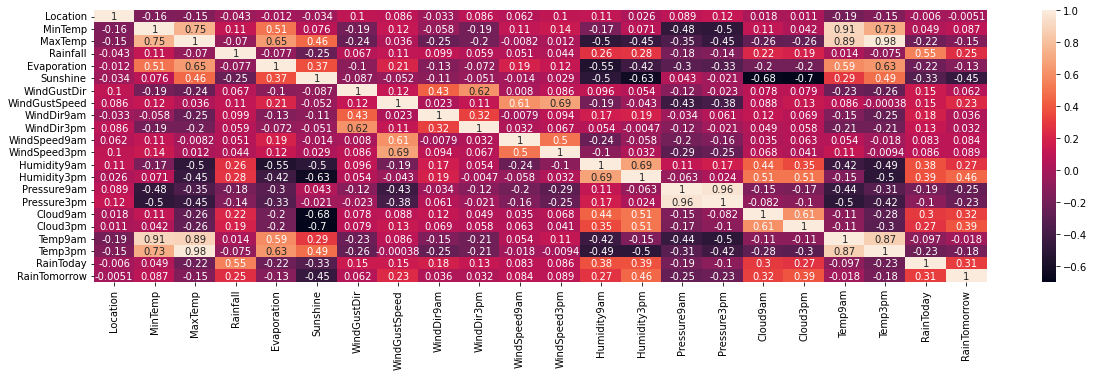

In [ ]:
plt.figure(figsize=(20,5))
sns.heatmap(df.corr(),annot=True)

Dari heatmap diatas terlihat jelas terdapat 6 atribut yang memiliki hubungan paling baik dengan RainTomorrow, yaitu:
- RainToday
- Cloud9am
- Cloud3pm
- Humidity9am
- Humidity3pm
- Rainfall

Mari buat dataframe baru untuk menggabungkan ketujuh atribut tersebut.

In [ ]:
final_df = pd.DataFrame(df[['RainTomorrow', 'RainToday', 'Cloud9am', 'Cloud3pm', 'Humidity9am', 'Humidity3pm', 
            'Rainfall']])

## Scalling data

In [ ]:
scaler = StandardScaler()
datax = final_df.drop(['RainTomorrow'], axis=1)

X = scaler.fit_transform(datax)
y = final_df['RainTomorrow']

## Splitting data

Membagi data menjadi 80% untuk pelatihan dan 20% untuk pengujian

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Modelling

Pada modelling kali ini kita akan membandingkan antara algoritma Logistic Regression dengan Support Vector Machine (SVM) untuk melakukan prediksi terkait **"Apakah besok hujan?"**

In [ ]:
# Logistic Regression
logres = LogisticRegression()
logres.fit(x_train, y_train)

lr_pred = logres.predict(x_test)

print("Accuracy Score: ", accuracy_score(y_test, lr_pred))
print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

Accuracy Score:  0.836582772066643
[[8309  460]
 [1384 1131]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      8769
           1       0.71      0.45      0.55      2515

    accuracy                           0.84     11284
   macro avg       0.78      0.70      0.73     11284
weighted avg       0.82      0.84      0.82     11284



In [ ]:
# Support Vector Machine (SVM)
svm_model = SVC(probability=True)
svm_model.fit(x_train, y_train)
        
pred_svm = svm_model.predict(x_test)

print("Accuracy Score:", accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))
print(classification_report(y_test, pred_svm))

Accuracy Score: 0.8384438142502658
[[8496  273]
 [1550  965]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.90      8769
           1       0.78      0.38      0.51      2515

    accuracy                           0.84     11284
   macro avg       0.81      0.68      0.71     11284
weighted avg       0.83      0.84      0.82     11284



## Model Evaluation

In [ ]:
print("Logistic Regression:", accuracy_score(y_test, lr_pred))
print("SVM:", accuracy_score(y_test, pred_svm))

Logistic Regression: 0.836582772066643
SVM: 0.8384438142502658


Logistic Regression adalah algoritma terbaik yang menghasilkan akurasi score tertinggi.

**Jadi, algoritma yang akan kita gunakan dalam prediksi ini adalah Logistic Regression.**

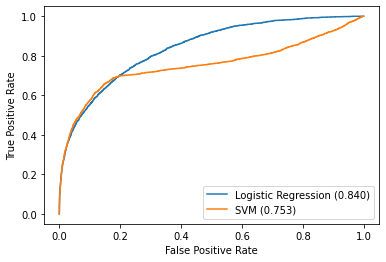

In [ ]:
#define metrics
y_pred_proba1 = logres.predict_proba(x_test)[::,1]
fpr1, tpr1, _ = roc_curve(y_test, y_pred_proba1)
auc1 = auc(fpr1, tpr1)

y_pred_proba2 = svm_model.predict_proba(x_test)[::,1]
fpr2, tpr2, _ = roc_curve(y_test, y_pred_proba2)
auc2 = auc(fpr2, tpr2)

#create ROC curve
plt.plot(fpr1,tpr1, label='Logistic Regression (%0.3f)' % auc1)
plt.plot(fpr2,tpr2, label='SVM (%0.3f)' % auc2)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()

plt.show()

## Predictive System

In [ ]:
''' data yang dibutuhkan pada input_data
input_data =
["RainToday", "Cloud9am", "Cloud3pm", "Humidity9am", "Humidity3pm", "Rainfall"]'''

input_data = (0, 2.0, 5.0, 20.0, 13.0, 0.)

input_data_as_numpy_array = np.array(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = logres.predict(input_data_reshape)
print(prediction)

if (prediction==1):
  print("Besok Hujan")
else:
  print("Besok Tidak Hujan")

[1]
Besok Hujan


## Saving Model

In [ ]:
pickle.dump(logres, open('model.pkl', 'wb'))